In [1]:
import pandas as pa
from FIM import eclat
from FIM import association_rules

In [2]:
data=pa.read_excel("Transaksi Penjualan Obat.xlsx")
data.head()

,Nomor Ref,Tanggal,Kode PLU,Nama Produk,Satuan,Harga Satuan,QTY,Jum. Penjualan
0,RJJ-0000001,2022-03-02 00:00:00,400,SAKATONIK ABC GRAPE 30,PCS,17000.0,1,17000.0
1,RJJ-0000002,2022-03-02 00:00:00,294,MINYAK KAYU PUTIH LANG 60,PCS,23000.0,2,46000.0
2,RJJ-0000003,2022-03-02 00:00:00,290,MINYAK HERBA SINERGI 2020,PCS,35000.0,1,35000.0
3,RJJ-0000003,2022-03-02 00:00:00,325,NEUROBION 5 STRIP @10 TAB,PCS,2500.0,1,2500.0
4,RJJ-0000004,2022-03-03 00:00:00,36,AMLODIPIN 5MG,PCS,400.0,3,1200.0


In [3]:
data.columns

Index(['Nomor Ref', 'Tanggal', 'Kode PLU', 'Nama Produk', 'Satuan',
       'Harga Satuan', 'QTY', 'Jum. Penjualan'],
      dtype='object')

In [4]:
data['Nama Produk']=data['Nama Produk'].str.strip()

data.dropna(axis=0,subset=['Nomor Ref'], inplace = True)
data['Nomor Ref']=data['Nomor Ref'].astype('str')

In [5]:
newdata=data.groupby(['Nomor Ref','Nama Produk'])['QTY'].sum().unstack().reset_index().fillna(0).set_index('Nomor Ref')
newdata

Nama Produk,ACETYLSISTEIN NULAB 200MG BOX 10 PCS STRIP@10 CAPS,ALOCLAIR PLUS GEL 8 GRAM TUBE,AMBEVEN BOX 10 BLS @ 10 CAPS,AMLODIPIN 5MG,AMOXICILLIN 500 MG,ANAKONIDIN 60 ML,ANTANGIN CAIR JRG,ANTANGIN HABBATUSSAUDA CAIR,ANTIS HANDSPRAY SANITIZER 30ML,ASAM MEFENAMAT 500 MG,...,SWEETY SILVER PANTS S32,TEMPRA DROPS RASA ANGGUR 15 ML,THROMBOPHOB GEL 20 GR,VICEE JERUK 50 STRIP @2 TAB,VICEE STRAWBERRY 50 STRIP @2 TAB,VITAL EAR OIL,WOODS LOZENGES HONEY LEMON ISI 6,XONCE,ZAMBUK OINTMENT 25 GR,ZEGAVIT
Nomor Ref,,,,,,,,,,,,,,,,,,,,,
RJJ-0000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RJJ-0000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RJJ-0000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RJJ-0000004,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RJJ-0000005,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RJJ-0000305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RJJ-0000306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RJJ-0000307,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def hot_encode(x):
    if(x<= 0):
        return False
    if(x>=1):
        return True

In [7]:
newdata_encoded=newdata.applymap(hot_encode)
newdata=newdata_encoded
newdata

Nama Produk,ACETYLSISTEIN NULAB 200MG BOX 10 PCS STRIP@10 CAPS,ALOCLAIR PLUS GEL 8 GRAM TUBE,AMBEVEN BOX 10 BLS @ 10 CAPS,AMLODIPIN 5MG,AMOXICILLIN 500 MG,ANAKONIDIN 60 ML,ANTANGIN CAIR JRG,ANTANGIN HABBATUSSAUDA CAIR,ANTIS HANDSPRAY SANITIZER 30ML,ASAM MEFENAMAT 500 MG,...,SWEETY SILVER PANTS S32,TEMPRA DROPS RASA ANGGUR 15 ML,THROMBOPHOB GEL 20 GR,VICEE JERUK 50 STRIP @2 TAB,VICEE STRAWBERRY 50 STRIP @2 TAB,VITAL EAR OIL,WOODS LOZENGES HONEY LEMON ISI 6,XONCE,ZAMBUK OINTMENT 25 GR,ZEGAVIT
Nomor Ref,,,,,,,,,,,,,,,,,,,,,
RJJ-0000001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RJJ-0000002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RJJ-0000003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RJJ-0000004,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RJJ-0000005,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RJJ-0000305,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RJJ-0000306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RJJ-0000307,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
from FIM import eclat
from FIM import association_rules

In [9]:
import time

start_time = time.time()
freq_items = eclat(newdata, min_support=0.01)
end_time = time.time()
total_time = end_time - start_time

rules1 = association_rules(freq_items, metric="confidence", min_threshold=0.5)

print(freq_items)

print(rules1)

print(f"\nWaktu komputasi ECLAT: {total_time:.5f} detik")

     support                                           itemsets
0   0.013378  (ACETYLSISTEIN NULAB 200MG BOX 10 PCS STRIP@10...
1   0.010033                    (ALOCLAIR PLUS GEL 8 GRAM TUBE)
2   0.013378                     (AMBEVEN BOX 10 BLS @ 10 CAPS)
3   0.013378                                    (AMLODIPIN 5MG)
4   0.016722                               (AMOXICILLIN 500 MG)
..       ...                                                ...
71  0.013378                      (VICEE JERUK 50 STRIP @2 TAB)
72  0.010033                 (VICEE STRAWBERRY 50 STRIP @2 TAB)
73  0.013378                 (WOODS LOZENGES HONEY LEMON ISI 6)
74  0.026756                                            (XONCE)
75  0.013378                                          (ZEGAVIT)

[76 rows x 2 columns]
                         antecedents                        consequents  \
0  (CESSA BABY 0-2 TH BODY FIT 8 ML)                      (SANMOL DROP)   
1                      (SANMOL DROP)  (CESSA BABY 0-2 TH BO

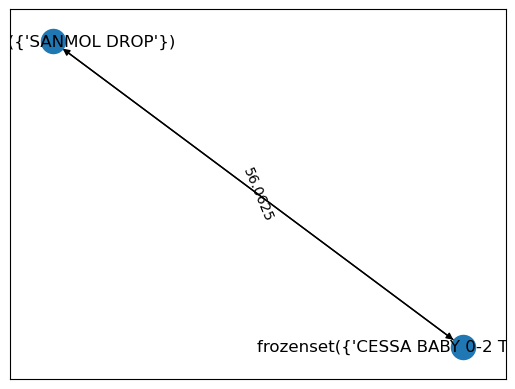

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for _, rule in rules1.iterrows():
    G.add_edge(rule['antecedents'], rule['consequents'], weight=rule['support'])

pos = nx.spring_layout(G)

edge_labels = {(rule['antecedents'], rule['consequents']): ( rule['lift']) 
               for _, rule in rules1.iterrows()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

nx.draw_networkx(G, pos, with_labels=True)

plt.show()

In [12]:
start_time = time.time()
freq_items = eclat(newdata, min_support=0.01)
end_time = time.time()
total_time = end_time - start_time

rules2 = association_rules(freq_items, metric="confidence", min_threshold=0.3)

print(freq_items)

print(rules2)

print(f"\nWaktu komputasi ECLAT: {total_time:.5f} detik")

     support                                           itemsets
0   0.013378  (ACETYLSISTEIN NULAB 200MG BOX 10 PCS STRIP@10...
1   0.010033                    (ALOCLAIR PLUS GEL 8 GRAM TUBE)
2   0.013378                     (AMBEVEN BOX 10 BLS @ 10 CAPS)
3   0.013378                                    (AMLODIPIN 5MG)
4   0.016722                               (AMOXICILLIN 500 MG)
..       ...                                                ...
71  0.013378                      (VICEE JERUK 50 STRIP @2 TAB)
72  0.010033                 (VICEE STRAWBERRY 50 STRIP @2 TAB)
73  0.013378                 (WOODS LOZENGES HONEY LEMON ISI 6)
74  0.026756                                            (XONCE)
75  0.013378                                          (ZEGAVIT)

[76 rows x 2 columns]
                         antecedents                        consequents  \
0  (CESSA BABY 0-2 TH BODY FIT 8 ML)                      (SANMOL DROP)   
1                      (SANMOL DROP)  (CESSA BABY 0-2 TH BO

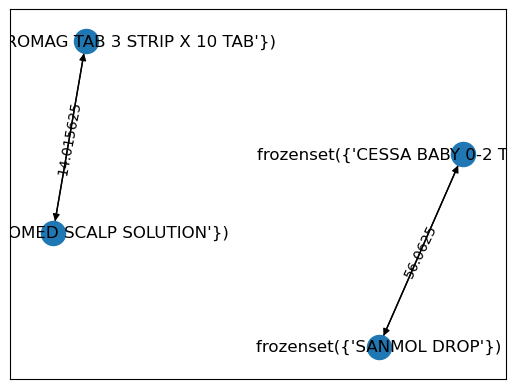

In [13]:
G = nx.DiGraph()

for _, rule in rules2.iterrows():
    G.add_edge(rule['antecedents'], rule['consequents'], weight=rule['support'])

pos = nx.spring_layout(G)

edge_labels = {(rule['antecedents'], rule['consequents']): ( rule['lift']) 
               for _, rule in rules2.iterrows()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

nx.draw_networkx(G, pos, with_labels=True)

plt.show()